## First import some useful python libraries 

In [2]:
%matplotlib inline
import numpy as np           ## For array manipulation
import pylab as py           ## For plotting
import matplotlib.cm as cm   ## For plotting
import netCDF4 as nc         ## For using netcdf

## Save the file name in a variable

In [3]:
source_file = "/project2/tas1/am2rad_season/am2seas_lacis_250m/noGHG_250m.atmos.nc"

## Import the netcdf file using the following command

In [4]:
v_var  = nc.Dataset(source_file,'r')  # Read the dataset
data   = v_var.variables              # Get the variable names  

#### * The first thing you might want to do find out what's in it. The print function comes in handy here. 
#### * Just do print (data). It will list all the details in the data variable. 
#### * Using the command: list(data.keys()) will list all the variable names
#### * This data has a variable called surface temperature. We will load all the necessary variables term by term as shown below

In [7]:
# list(data.keys())

In [33]:
tsurf = data['t_surf'][:]
lat   = data['lat'][:]
lon   = data['lon'][:]
times  = data['time'][:]

##### netcdf stores the 'time' in Julian data type. 
##### We can convert the time from Julian units to a readable date time object. This helps in extracting the month, day, year, hours, second individually

In [50]:
time = nc.num2date(times, units=data['time'].units, calendar= data['time'].calendar )

In [59]:
print ("First year =",time[0].year)
print ("Last  year =",time[-1].year)
print ("No of years = ", (2081-2032)+1)
print ("Surface temperature shape =",tsurf.shape)
print ("Latitude shape =",lat.shape)

First year = 2032
Last  year = 2081
No of years =  50
Surface temperature shape = (600, 90)
Latitude shape = (90,)


##### The file has 50 years of monthly data. Therefore 50*12 = 600 data points along time axis. 
##### We can reshape the data into year and month axis and take an average over all the years or over all the years

In [82]:
tsurf_reshaped                = tsurf.reshape((50,12,90))
monthly_tsurf                 = tsurf_reshaped.mean(axis=0) ## Average along years
interannual_mean_tsurf        = tsurf_reshaped.mean(axis=1) ## Average along months

### Few lines to get some quick plots

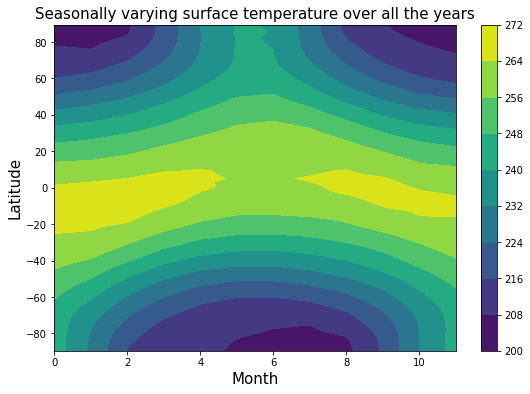

In [114]:
py.figure(figsize=(9,6))
py.contourf(range(12), lat, monthly_tsurf.T); py.colorbar()  ### Here .T is used the plot the transpose of t_surf
py.xlabel("Month", fontsize=15)
py.ylabel("Latitude", fontsize=15)
py.title("Seasonally varying surface temperature over all the years", fontsize=15)
py.savefig("Example_figures/Monthly_SST.png")

##### Let us look at the variation of surface temperature over 50 years at a particular latitude, say near equator between 30 to 70 degree latitude.

In [110]:
lat_bound_lower              = 30 ## degree latitude
lat_bound_upper              = 70 ## degree latitude
equator_lat                  = lat[(lat > lat_bound_lower) & (lat <lat_bound_upper)]
equatorial_tsurf             = tsurf_reshaped[:, :, (lat > lat_bound_lower) & (lat < lat_bound_upper)].mean(axis=-1)  ## Average along latitude axis
equatorial_tsurf_interannual = equatorial_tsurf.mean(axis = 1)  ## Average along month axis 

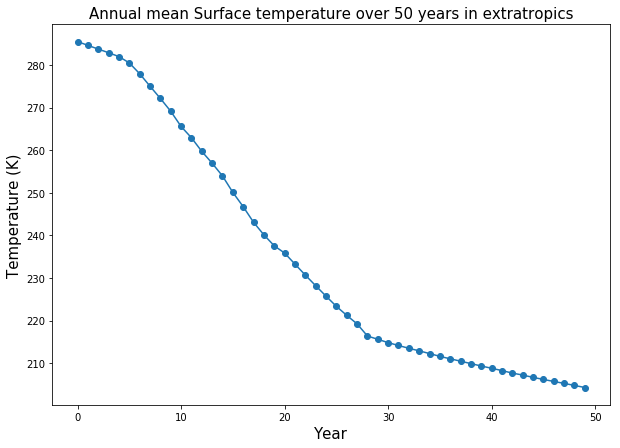

In [113]:
py.figure(figsize=(10,7))
py.plot(range(50),equatorial_tsurf_interannual, 'o-'); 
py.xlabel("Year", fontsize=15)
py.ylabel("Temperature (K)", fontsize=15)
py.title("Annual mean Surface temperature over 50 years in extratropics", fontsize=15)
py.savefig("Example_figures/Annual_mean_SST_in_extratropics.png")